# Looking at Baltimore City Government "Customer Churn" 

Look at the "churn" of Baltimore City employees based on their employment time with Baltimore City government

## import libraries 

In [10]:
import pandas as pd # for data analysis
import numpy as np # for data analysis
import plotly.express as px # to visualize data

## import data 

In [2]:
# baltimore city salary data aggregated 
df = pd.read_csv("total_bmore_city_salaries_2011_2019.csv")

In [3]:
# preview data
df.head()

,employee_name,jobtitle,deptid,dept_name,hire_dt,annual_rt,gross,fiscal_year,years_in_gov
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,50845.0,45505.94,2011,40.062412
1,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,56595.0,51588.89,2011,13.140573
2,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,56500.0,50633.26,2011,10.315053
3,"Abdal-Rahim,Naim A",EMT Firefighter,A64063,Fire Academy Recruits,2011-03-30,33476.0,3888.95,2011,8.631240
4,"Abdi,Ezekiel W",POLICE OFFICER,A99398,Police Department,2007-06-14,50919.0,51421.73,2011,12.423241


## clean/reorganize data 

First, let's look at the general trend of employees in Baltimore City government over all of the available fiscal years.

In [18]:
# use plotly express to make a line graph of number of Baltimore City employee trends
# but first, aggregate the data to count the number of employees in each fiscal year

df_all_emp = df.groupby("fiscal_year")["employee_name"].agg(["count"]).reset_index()

In [19]:
# look at aggregated dataset
df_all_emp

,fiscal_year,count
0,2011,14454
1,2012,16049
2,2013,19137
3,2014,18981
4,2015,14017
5,2016,13818
6,2017,13483
7,2018,13683
8,2019,13811


In [22]:
# make line graph with plotly
line_all_emp = px.line(df_all_emp,
                      x = "fiscal_year",
                      y = "count",
                      title = "Number of Baltimore City Government Employees Across Fiscal Years 2011-2019")

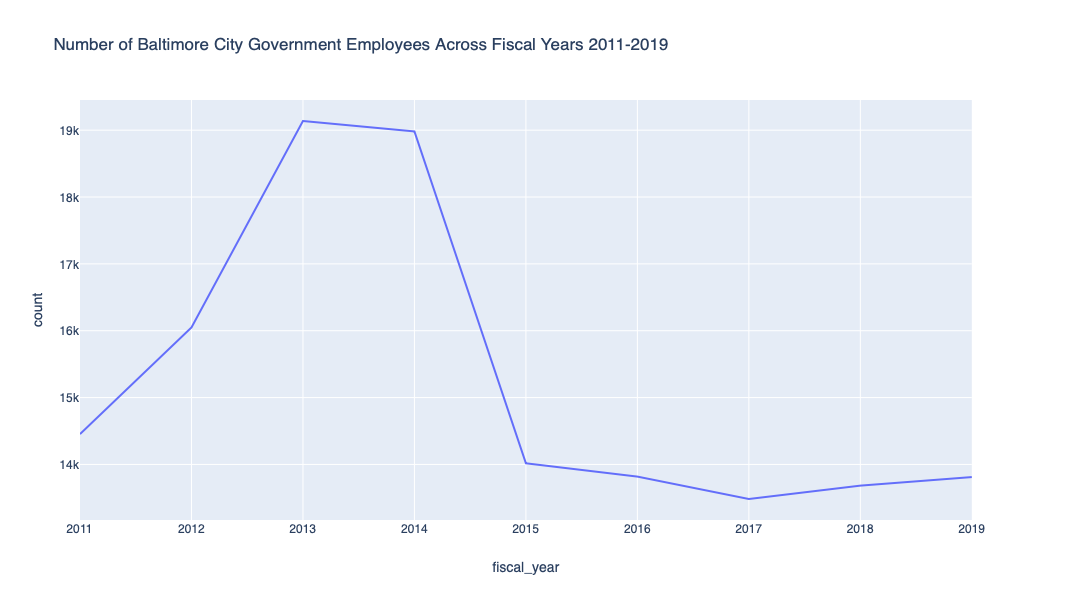

In [23]:
line_all_emp

In [41]:
# look at all unique department names:
df["dept_name"].unique().tolist()

['OED-Employment Dev',
 'States Attorneys Office',
 'HLTH-Health Department',
 'Fire Academy Recruits',
 'Police Department',
 'Liquor License Board',
 'Enoch Pratt Free Library',
 'Housing & Community Dev',
 'TRANS-Highways',
 'TRANS-Traffic',
 'DPW-Solid Waste',
 'Fire Department',
 'Circuit Court',
 'DPW-Water & Waste Water',
 'FIN-Collections',
 'M-R Convention Center',
 'TRANS-Crossing Guards',
 "Sheriff's Office",
 'FIN-Purchasing',
 'COMP-Communication Services',
 'COMP-Audits',
 'R&P-Parks',
 'Youth Cust',
 'R&P-Recreation',
 'General Services',
 'R&P-Administration',
 'Legislative Reference',
 'HR-Human Resources',
 'FIN-Admin & Budgets',
 'M-R Info Technology',
 'TRANS-Towing',
 'COMP-Real Estate',
 'Youth Temp Adult',
 'Law Department',
 'City Council',
 'FPR Admin',
 'DPW-Administration',
 'Elections',
 'Community Relations',
 'FIN-Acct & Payroll',
 'Planning Department',
 "COMP-Comptroller's Office",
 'Mayors Office',
 'ERS/EOS Admin',
 'M-R Environmental Cntrl',
 'Council

In [40]:
# some of these names are not grouped together because there extra spaces in the title 
# or because there are different sub-categories of departments

# first, we'll strip the department names to remove unnecessary spaces
df["dept_name"] = df["dept_name"].str.strip()

In [43]:
# now, let's combine the subcategories of the departments so that we get a more hollistic view of departmental changes and size
# we see that ["HLTH", "COMP", "TRANS", "FIN", "DPW", "R&P"] all have subcategories,
# so we'll write a function to keep only the capital abreviation of the department name

# items we want to group together
subcategories = ["HLTH", "COMP", "TRANS", "FIN", "DPW", "R&P"]

# join the list with a pipe to indicate an "or" when we write our action later
joined_sub = "|".join(subcategories) 

In [44]:
# our joined list looks this
# and reads as "HLTH OR COMP OR TRANS OR FIN OR DPW OR R&P"
joined_sub

'HLTH|COMP|TRANS|FIN|DPW|R&P'

In [46]:
# "redefine" department name using np.where, which is similar to an Excel IF statement
# format: np.where(condition, value if true, value if false)

df["dept_name"] = np.where(df["dept_name"].str.contains(joined_sub), # condition is if the value in "dept_name" is in the list
                           df["dept_name"].str.split("-", expand = True)[0], # if it's in the list, keep only the CAPS letters
                          df["dept_name"]) #if it's false, keep the original dept name

In [47]:
# preview our revised dataset
# notice that HLTH is now only HLTH
df.head(10)

,employee_name,jobtitle,deptid,dept_name,hire_dt,annual_rt,gross,fiscal_year,years_in_gov
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,50845.0,45505.94,2011,40.062412
1,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,56595.0,51588.89,2011,13.140573
2,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH,2009-07-23,56500.0,50633.26,2011,10.315053
3,"Abdal-Rahim,Naim A",EMT Firefighter,A64063,Fire Academy Recruits,2011-03-30,33476.0,3888.95,2011,8.631240
4,"Abdi,Ezekiel W",POLICE OFFICER,A99398,Police Department,2007-06-14,50919.0,51421.73,2011,12.423241
5,"Abdul Hamid,Umar",LIQUOR BOARD INSPECTOR II,A09001,Liquor License Board,1995-01-17,43278.0,39116.93,2011,24.828698
6,"Abdul Saboor,Jamillah",OFFICE ASST II,A75067,Enoch Pratt Free Library,2009-07-27,26388.0,23758.19,2011,10.304101
7,"Abdul-Jabbar,Bushra A",SOCIAL SERVICES COORDINATOR,A65201,HLTH,2008-04-14,38582.0,31096.45,2011,11.588179
8,"Abdullah,Beverly A",TYPIST III,A06004,Housing & Community Dev,1986-12-01,34453.0,31273.03,2011,32.957544
9,"Abdullahi,Sharon M",911 OPERATOR,A99371,Police Department,2004-06-10,37677.0,36844.61,2011,15.432201


In [48]:
# we also want to fix the "Mayors Office" vs "Mayor's Office" difference
# we'll change all mayor's office to "Mayors Office"

df["dept_name"] = np.where(df["dept_name"] == "Mayor's Office", # if value equals "Mayor's Office"
                          "Mayors Office", # change to "Mayors Office"
                          df["dept_name"]) # otherwise, keep the same

In [50]:
# look at the unique departments now
df["dept_name"].unique().tolist()

['OED-Employment Dev',
 'States Attorneys Office',
 'HLTH',
 'Fire Academy Recruits',
 'Police Department',
 'Liquor License Board',
 'Enoch Pratt Free Library',
 'Housing & Community Dev',
 'TRANS',
 'DPW',
 'Fire Department',
 'Circuit Court',
 'FIN',
 'M-R Convention Center',
 "Sheriff's Office",
 'COMP',
 'R&P',
 'Youth Cust',
 'General Services',
 'Legislative Reference',
 'HR-Human Resources',
 'M-R Info Technology',
 'Youth Temp Adult',
 'Law Department',
 'City Council',
 'FPR Admin',
 'Elections',
 'Community Relations',
 'Planning Department',
 'Mayors Office',
 'ERS/EOS Admin',
 'M-R Environmental Cntrl',
 'Council Services',
 'TANF Cust',
 'War Memorial Commission',
 'HR-Test Monitor',
 'M-R Labor Commissioner',
 'Special City Services',
 'Municipal & Zoning Appeals 001',
 'Wage Commissioner',
 'M-R Cable & Comm',
 "Orphan's Court",
 'M-R Human Services',
 'Civil Rights & Wage Enforce',
 'Youth Summer',
 'OED-Participants-Youth Summer',
 'Municipal & Zoning Appeal',
 'Civil

In [56]:
# we'll export this cleaned dataset as a csv to work with later
df.to_csv("baltimore_salaries_2011_2019_agg_dept.csv")

In [51]:
# how many unique departments are there?
df["dept_name"].nunique()

51

In [52]:
# there seems to be some organizational change in 2015
# let's look at the trends of number of employees per department over the fiscal years
# first, we'll create a new aggregated dataset

df_dept_count = df.groupby(["fiscal_year", "dept_name"])["employee_name"].agg(["count"]).reset_index()

In [53]:
# preview data
df_dept_count.head(10)

,fiscal_year,dept_name,count
0,2011,COMP,91
1,2011,Circuit Court,154
2,2011,City Council,88
3,2011,Community Relations,10
4,2011,Council Services,5
5,2011,DPW,2356
6,2011,ERS/EOS Admin,27
7,2011,Elections,6
8,2011,Enoch Pratt Free Library,442
9,2011,FIN,265


In [65]:
# make a plotly chart to look at all of the departments on the same graph
line_dept = px.line(df_dept_count,
                   x= "fiscal_year",
                   y = "count", 
                   color = "dept_name",
                   title = "Number of Employees in Baltimore City Government Departments in Fiscal Years 2011-2019",
                   #range_y = [0, 200]
                   )

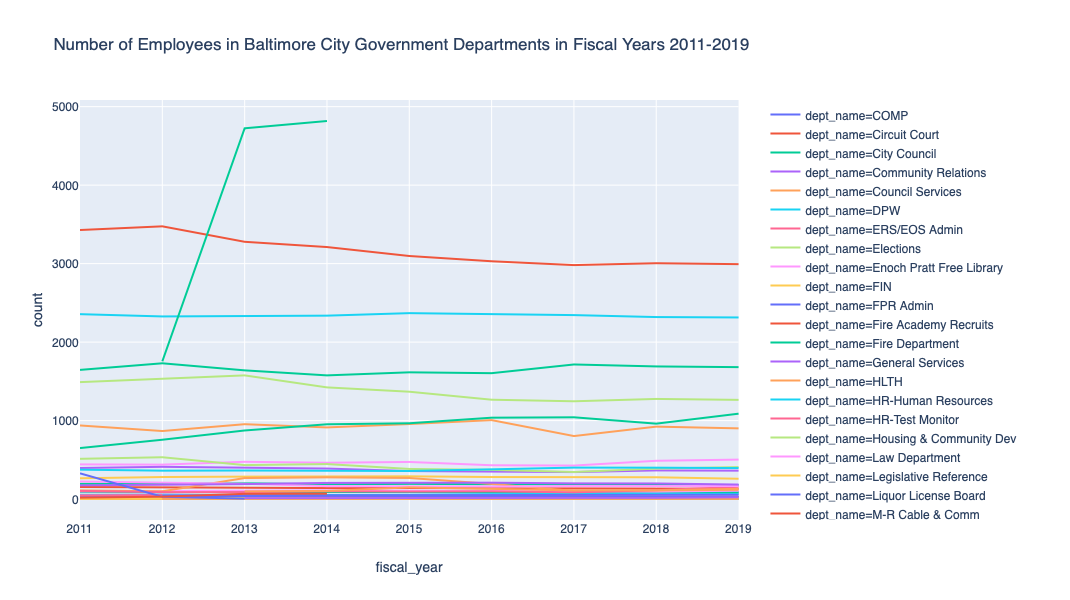

In [66]:
line_dept

In [67]:
# we see that the total number of employees hasn't drastically changed for each department over each fiscal year
# but this doesn't tell us the turnover of employees in each department
# now, we'll calculate employee churn for the entire city government

# look at aggregated data
df_all_emp

,fiscal_year,count
0,2011,14454
1,2012,16049
2,2013,19137
3,2014,18981
4,2015,14017
5,2016,13818
6,2017,13483
7,2018,13683
8,2019,13811


In [94]:
# create a new column that calculates the number of employees lost in that fiscal year
df_all_emp["lost"] = df_all_emp["count"].diff()*(-1)

In [95]:
df_all_emp

,fiscal_year,count,lost,employee_churn,pct_diff
0,2011,14454,NaN,NaN,NaN
1,2012,16049,-1595.0,9.938314,0.110350
2,2013,19137,-3088.0,16.136281,0.192411
3,2014,18981,156.0,-0.821875,-0.008152
4,2015,14017,4964.0,-35.414140,-0.261525
5,2016,13818,199.0,-1.440151,-0.014197
6,2017,13483,335.0,-2.484610,-0.024244
7,2018,13683,-200.0,1.461668,0.014833
8,2019,13811,-128.0,0.926797,0.009355


In [96]:
# customer churn column 
# lost/total employees
df_all_emp["employee_churn"] = (df_all_emp["lost"]/df_all_emp["count"])*100

In [97]:
df_all_emp

,fiscal_year,count,lost,employee_churn,pct_diff
0,2011,14454,NaN,NaN,NaN
1,2012,16049,-1595.0,-9.938314,0.110350
2,2013,19137,-3088.0,-16.136281,0.192411
3,2014,18981,156.0,0.821875,-0.008152
4,2015,14017,4964.0,35.414140,-0.261525
5,2016,13818,199.0,1.440151,-0.014197
6,2017,13483,335.0,2.484610,-0.024244
7,2018,13683,-200.0,-1.461668,0.014833
8,2019,13811,-128.0,-0.926797,0.009355


In [79]:
df_dept_count.head()

,fiscal_year,dept_name,count
0,2011,COMP,91
1,2011,Circuit Court,154
2,2011,City Council,88
3,2011,Community Relations,10
4,2011,Council Services,5


In [83]:
# sort by fiscal year and then by department name
df_dept_count = df_dept_count.sort_values (by = ["dept_name","fiscal_year"])

In [85]:
df_dept_count.head(10)

,fiscal_year,dept_name,count
0,2011,COMP,91
42,2012,COMP,86
83,2013,COMP,95
124,2014,COMP,90
163,2015,COMP,91
200,2016,COMP,87
240,2017,COMP,95
277,2018,COMP,86
314,2019,COMP,87
1,2011,Circuit Court,154


In [99]:
# for each fiscal year, calculate the difference between it and the above row
df_dept_count["lost"] = np.where(df_dept_count["fiscal_year"].diff() == 1.0, # if fiscal year difference = 1.0
                                df_dept_count["count"].diff()* (-1), # calculate the number of employees lost
                                "NaN") # otherwise NaN

In [102]:
df_dept_count.head(10)

,fiscal_year,dept_name,count,lost
42,2012,COMP,86,5.0
83,2013,COMP,95,-9.0
124,2014,COMP,90,5.0
163,2015,COMP,91,-1.0
200,2016,COMP,87,4.0
240,2017,COMP,95,-8.0
277,2018,COMP,86,9.0
314,2019,COMP,87,-1.0
43,2012,Circuit Court,149,5.0
84,2013,Circuit Court,139,10.0


In [101]:
# remove all non number "lost" rows
df_dept_count = df_dept_count[df_dept_count["lost"] != "NaN"]

In [105]:
# redefine as a float
df_dept_count["lost"] = df_dept_count["lost"].astype(float)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
# calculate employee churn in each department for each fiscal year
df_dept_count["churn"] = (df_dept_count["lost"]/df_dept_count["count"])*100

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
df_dept_count.head(10)

,fiscal_year,dept_name,count,lost,churn
42,2012,COMP,86,5.0,5.813953
83,2013,COMP,95,-9.0,-9.473684
124,2014,COMP,90,5.0,5.555556
163,2015,COMP,91,-1.0,-1.098901
200,2016,COMP,87,4.0,4.597701
240,2017,COMP,95,-8.0,-8.421053
277,2018,COMP,86,9.0,10.465116
314,2019,COMP,87,-1.0,-1.149425
43,2012,Circuit Court,149,5.0,3.355705
84,2013,Circuit Court,139,10.0,7.194245


In [110]:
# plot the churn of departments on a line graph
line_dept_churn = px.line(df_dept_count, # use revised data frame
                         x = "fiscal_year", # fiscal year on the x axis
                         y = "churn", # churn rate on the 
                          color = "dept_name",
                         title = "Baltimore City Employee Churn By Department")

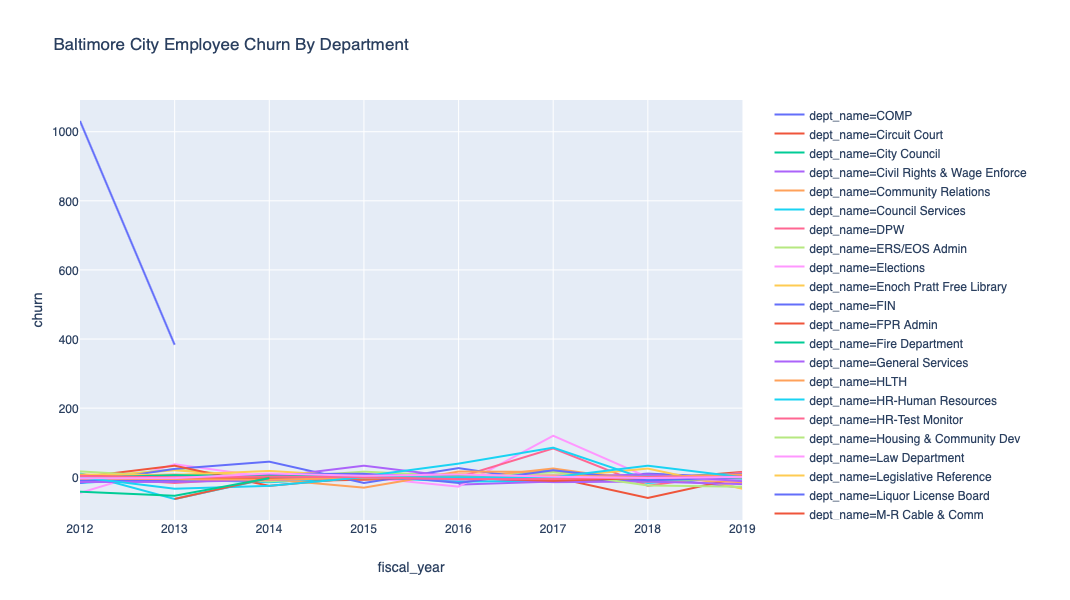

In [111]:
line_dept_churn

Each __employee_name__ is a unique identifier for the employee, so we'll use this to restructure the data and build out columns for their salary during each fiscal year. This will help us determine the number of employees lost and gained each fiscal year and how each employee's salary changed over each fiscal year. 

In [12]:
# make pivot table with employee data to keep
## gross salary of each employee
## separated in columns for each fiscal year

df_employee = pd.pivot_table(df, values = "gross", 
                             index = "employee_name", 
                             columns = "fiscal_year", 
                             aggfunc = np.sum).reset_index()

In [15]:
df_employee.head(20)

fiscal_year,employee_name,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"AKROFI,BERNARD",NaN,NaN,14387.30,NaN,NaN,NaN,NaN,NaN,NaN
1,"Aaron,Kareem D",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25743.94
2,"Aaron,Keairah T",NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,"Aaron,Keontae E",NaN,NaN,0.00,873.63,NaN,NaN,NaN,NaN,NaN
4,"Aaron,Patricia G",45505.94,52247.39,51771.01,52868.38,53626.04,54135.44,54992.37,58480.46,57806.13
5,"Aaron,Petra L",51588.89,59026.81,63909.03,67439.19,73000.08,72445.87,76951.93,79220.72,NaN
6,"Abadir,Adam O",NaN,NaN,NaN,NaN,NaN,NaN,27736.14,57375.31,64774.11
7,"Abaineh,Yohannes T",50633.26,57129.79,57428.85,58654.74,64403.84,NaN,NaN,NaN,NaN
8,"Abaku,Aigbolosimuan O",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11881.34,59361.55
9,"Abbeduto,Mack",NaN,NaN,NaN,NaN,NaN,NaN,2821.60,35138.40,61693.59


In [14]:
df_employee.describe()

fiscal_year,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,14402.000000,15999.000000,18842.000000,18788.000000,13864.000000,13669.000000,13439.000000,13472.000000,13626.000000
mean,42474.834984,43307.243956,37433.712846,38278.438664,55318.724987,55823.952081,55632.938317,60954.702997,60161.151845
std,22838.054881,28477.022073,31849.706572,33392.758684,32685.575371,34034.213288,35232.597458,36349.131741,38170.843565
min,7.250000,-77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27640.110000,23879.795000,1051.250000,1051.250000,34198.892500,33813.240000,32787.380000,37613.757500,35900.097500
50%,41192.665000,43231.220000,36766.495000,37146.290000,52433.660000,52647.530000,52395.230000,57191.220000,56529.805000
75%,58492.937500,63662.995000,61864.122500,63611.717500,75735.910000,75868.510000,78328.960000,81999.345000,82675.877500
max,170422.990000,245353.440000,238681.040000,238772.040000,235767.920000,238295.960000,244913.700000,250197.500000,260775.260000


## vizualize 